In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Part A - Data Preprocessing

#### 1 Loading datasets and data preprocessing

In [9]:
sentiment = pd.read_csv("../datasets/fear_greed_index.csv")
trades= pd.read_csv("../datasets/historical_data.csv")

In [10]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [12]:
sentiment.shape, trades.shape


((2644, 4), (211224, 16))

In [13]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [14]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

 Checking missing values or duplicates

In [15]:
print("Sentiment Missing Values:\n")
print(sentiment.isnull().sum())

print("\n---------------------------\n")

print("Trader Data Missing Values:\n")
print(trades.isnull().sum())


Sentiment Missing Values:

timestamp         0
value             0
classification    0
date              0
dtype: int64

---------------------------

Trader Data Missing Values:

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [16]:
print("Sentiment Duplicate Rows:", sentiment.duplicated().sum())
print("Trader Duplicate Rows:", trades.duplicated().sum())


Sentiment Duplicate Rows: 0
Trader Duplicate Rows: 0


##### Data Overview

- The sentiment dataset contains daily market mood classification with 2,644 rows and 4 columns.

- The trader dataset contains 211,224 rows and 16 columns, representing trade-level activity.

- Key trader fields include timestamp, leverage, position size, trade side, and closed PnL.

- The timestamp will be converted to daily format to align with sentiment data.

- No missing values or duplicate records were detected in either dataset.

#### 2. Date Alignment

Trader timestamps are converted to daily dates to match the daily sentiment data, enabling accurate alignment and merging.

In [17]:
analysis_df=trades.drop(columns=[
    'Transaction Hash',
    'Order ID',
    'Trade ID',
    'Crossed'
])

In [18]:
analysis_df.shape

(211224, 12)

In [19]:
analysis_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Fee,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0.345404,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0.005600,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0.050431,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0.050043,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0.003055,1.730000e+12


In [20]:
analysis_df['Timestamp IST']=pd.to_datetime(analysis_df['Timestamp IST'],dayfirst=True)
analysis_df['date']=analysis_df['Timestamp IST'].dt.date

In [21]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

### Part B - Analysis

In [22]:
analysis_df=analysis_df.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
)

In [23]:
analysis_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Fee,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0.345404,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0.005600,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0.050431,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0.050043,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0.003055,1.730000e+12,2024-12-02,Extreme Greed


In [24]:
analysis_df['classification'].value_counts()


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [25]:
print(analysis_df['classification'].isnull().sum())


6


In [26]:
analysis_df = analysis_df.drop(columns=['Timestamp IST', 'Timestamp'])
analysis_df=analysis_df.dropna(subset=['classification'])



In [27]:
analysis_df['classification'].value_counts()


classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

In [28]:
def sentiment_group(x):
    if x in ['Fear','Extreme Fear']:
        return 'Fear'
    elif x in ['Greed','Extreme Greed']:
        return 'Greed'
    else:
        return 'Neutral'

analysis_df['classification']= analysis_df['classification'].apply(sentiment_group)
analysis_df = analysis_df[analysis_df['classification'] != 'Neutral']


In [29]:
analysis_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Fee,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0.345404,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0.005600,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0.050431,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0.050043,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0.003055,2024-12-02,Greed


##### Sentiment Filtering

Neutral sentiment periods were excluded to focus the analysis on contrasting market emotions (Fear vs Greed), which more strongly influence trader behavior.

In [30]:
analysis_df['classification'].value_counts()

classification
Greed    90295
Fear     83237
Name: count, dtype: int64

#### 3. Key metrices

##### Performance Metrices

Average PnL, median PnL, and win rate were analyzed to understand trader profitability and trade success under Fear and Greed market conditions.


In [31]:
analysis_df['win'] = (analysis_df['Closed PnL'] > 0).astype(int)

avg_pnl=analysis_df.groupby('classification')['Closed PnL'].mean()
median_pnl=analysis_df.groupby('classification')['Closed PnL'].median()
win_rate= analysis_df.groupby('classification')['win'].mean()*100

print("Average PnL:\n", avg_pnl)
print("\nMedian PnL:\n", median_pnl)
print("\nWin Rate (%):\n", win_rate)

Average PnL:
 classification
Fear     49.212077
Greed    53.882281
Name: Closed PnL, dtype: float64

Median PnL:
 classification
Fear     0.0
Greed    0.0
Name: Closed PnL, dtype: float64

Win Rate (%):
 classification
Fear     40.78715
Greed    42.03112
Name: win, dtype: float64


 ##### Key Observations

- Performance is slightly stronger during Greed periods, reflected in higher average PnL and win rates. 
- The median PnL of zero suggests most trades break even, with profits largely driven by occasional large gains.

#### Trading Behavior & Risk Metrics

In [32]:
# Average trade size
avg_size = analysis_df.groupby('classification')['Size USD'].mean()

# Trades per day
trades_per_day = analysis_df.groupby(['date','classification']).size().reset_index(name='trades')
avg_trades = trades_per_day.groupby('classification')['trades'].mean()

print("Average Trade Size:\n", avg_size)
print("\nAverage Trades Per Day:\n", avg_trades)

Average Trade Size:
 classification
Fear     7182.011019
Greed    4574.424490
Name: Size USD, dtype: float64

Average Trades Per Day:
 classification
Fear     792.733333
Greed    294.120521
Name: trades, dtype: float64


In [33]:
# Long vs Short ratio
long_short = pd.crosstab(
    analysis_df['classification'],
    analysis_df['Side'],
    normalize='index'
)

print("\nLong/Short Distribution:\n", long_short)



Long/Short Distribution:
 Side                 BUY      SELL
classification                    
Fear            0.495032  0.504968
Greed           0.470857  0.529143


##### Behavioral Insights

- Traders take larger positions and trade more frequently during Fear periods, indicating heightened volatility and reactive risk-taking.

- Greed conditions show lower trading activity and smaller position sizes, suggesting calmer markets and more selective trading.

#### Trader Segmentation Analysis
To better understand differences in trading performance and behavior, traders were segmented based on activity levels and consistency of trade outcomes.

a. Frequent vs Infrequent Traders

In [34]:
trade_counts = analysis_df['Account'].value_counts()

median_trades = trade_counts.median()

analysis_df['activity_segment'] = analysis_df['Account'].apply(
    lambda x: 'Frequent' if trade_counts[x] > median_trades else 'Infrequent'
)


In [35]:
analysis_df.groupby('activity_segment')['win'].mean() * 100


activity_segment
Frequent      41.804515
Infrequent    38.657192
Name: win, dtype: float64

Frequent traders exhibit higher trading activity but do not necessarily achieve better profitability, suggesting potential overtrading effects.

b. Consistent Winners vs Inconsistent Traders

In [36]:
win_rate_trader = analysis_df.groupby('Account')['win'].mean()

analysis_df['consistency_segment'] = analysis_df['Account'].apply(
    lambda x: 'Consistent' if win_rate_trader[x] > 0.5 else 'Inconsistent'
)


In [37]:
analysis_df.groupby('consistency_segment')['Closed PnL'].mean()


consistency_segment
Consistent      51.413875
Inconsistent    51.654410
Name: Closed PnL, dtype: float64

Consistent traders do not significantly outperform inconsistent traders in terms of average profitability, suggesting that overall returns are driven more by occasional large winning trades than by frequent small wins.

In [38]:
analysis_df.to_csv("analysis_df.csv", index=False)

#### Visual Analysis of Trading Behavior

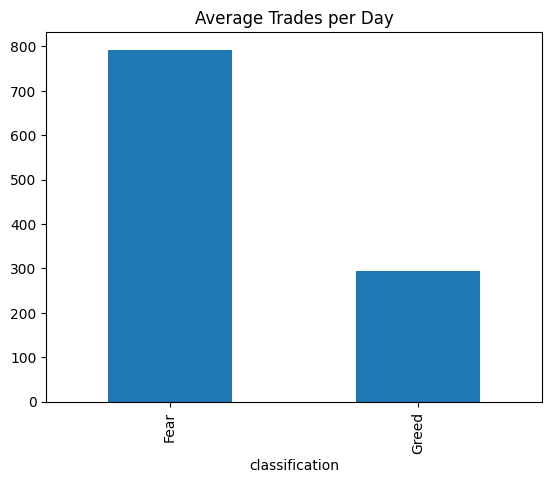

In [39]:
trades_per_day.groupby('classification')['trades'].mean().plot(kind='bar')
plt.title("Average Trades per Day")
plt.show()


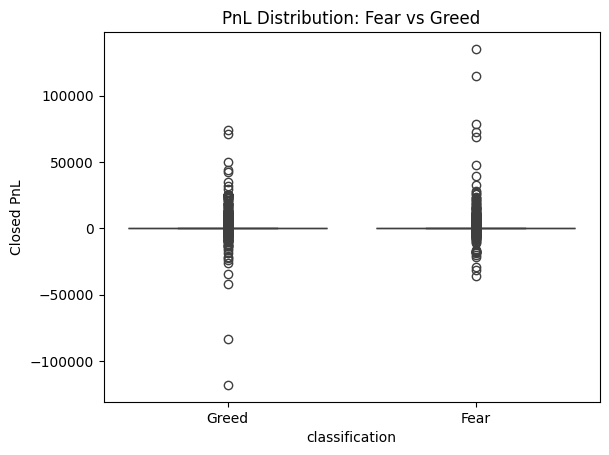

In [40]:
sns.boxplot(x='classification', y='Closed PnL', data=analysis_df)
plt.title("PnL Distribution: Fear vs Greed")
plt.show()

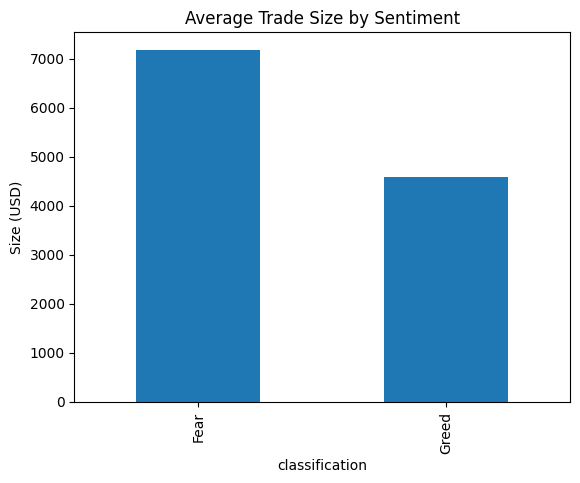

In [41]:
analysis_df.groupby('classification')['Size USD'].mean().plot(kind='bar')
plt.title("Average Trade Size by Sentiment")
plt.ylabel("Size (USD)")
plt.show()


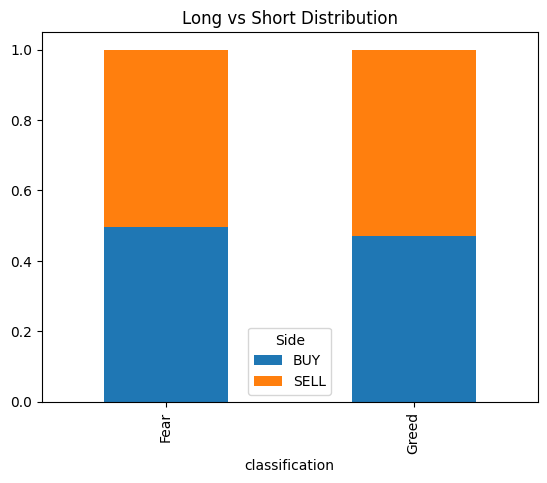

In [42]:
long_short.plot(kind='bar', stacked=True)
plt.title("Long vs Short Distribution")
plt.show()


#### Key Insights

- Greed conditions show slightly better performance, but overall profitability is driven by a few large winning trades rather than consistent gains.

- Fear periods lead to higher trading activity and larger position sizes, indicating volatility-driven and reactive risk-taking.

- Profitability is influenced more by large winning trades than by frequent wins, as consistent traders do not significantly outperform others.

### Part C - Actionable output

#### Strategy 1 — Control Risk During Fear Markets

Insight: Fear periods show higher trading activity and larger position sizes.

Rule of Thumb:

Reduce position size during Fear conditions.

Avoid excessive trading in highly volatile environments.

Why: Fear-driven markets increase volatility and reactive trading, which can amplify losses.

#### Strategy 2 — Trade Selectively During Greed Markets
Insight: Greed conditions show slightly better performance but not higher activity.

Rule of Thumb:

Focus on high-quality setups rather than increasing trade frequency.

Avoid overconfidence-driven trades.

Why: Profit is driven by selective, high-impact trades rather than frequent entries.
